# Explorando o dataset do Titanic
https://www.kaggle.com/c/titanic/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tensorflow as tf

# Carregando os dados

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Verificando se existem valores null

In [6]:
train.head()
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Limpezas dos dados
Para a coluna Age, vamos preencher os valores null com a média das idades
Para a coluna Cabin, vamos preencher os valores null com a letra 'N'
Para a coluna Embarked, vamos preencher os valores null com a moda

In [7]:
# Substituindo os valores nulos pela mediana
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

# Removendo a coluna Cabin
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

# Analise Exploratória dos dados

C:\Users\gabri\AppData\Local\Temp\ipykernel_26144\2677769180.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'], bins=20)


<Axes: xlabel='Age', ylabel='count'>

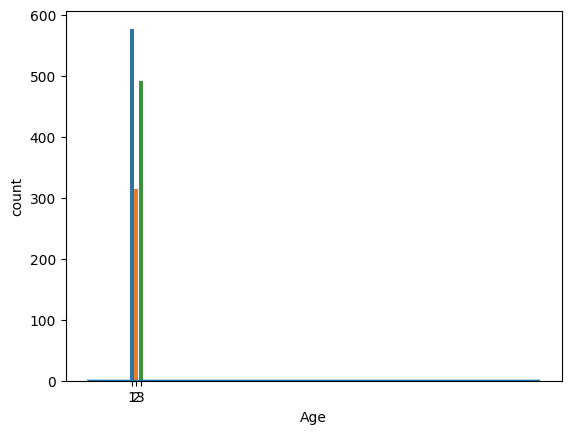

In [9]:
# Irei começar examinando a distribuição dos passageiros por sexo, classe e idade.

# distribuição dos passageiros por sexo
sns.countplot(x='Sex', data=train)

# distribuição dos passageiros por classe
sns.countplot(x='Pclass', data=train)

# distribuição dos passageiros por idade
sns.distplot(train['Age'], bins=20)

<Axes: xlabel='Survived', ylabel='count'>

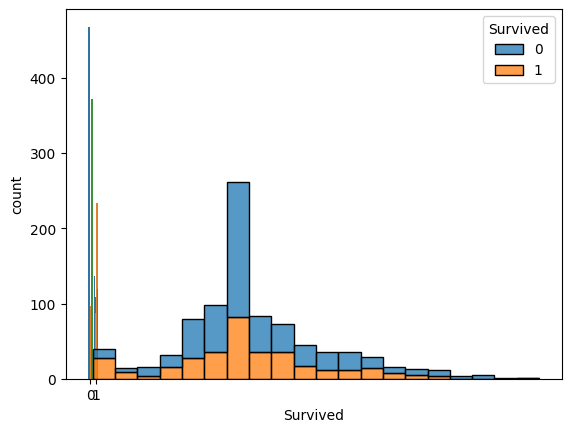

In [10]:
# relação entre sobrevivência e sexo
sns.countplot(x='Survived', hue='Sex', data=train)

# relação entre sobrevivência e classe
sns.countplot(x='Survived', hue='Pclass', data=train)

# relação entre sobrevivência e idade
sns.histplot(data=train, x='Age', bins=20, hue='Survived', multiple='stack')
